<a href="https://colab.research.google.com/github/JoeAM11/MachineLearning_EM23/blob/main/Tarea06_ML_Febrero_AprendizajaSupervisado_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤖 📓
# Tarea #06
#### Nombre :Joel Alejandro Rodarte Rivera 
#### Matrícula: 2173260


El siguiente cuaderno contiene:

* Algoritmos Supervisados para datasets de datos binarios. 
  * Logistic Regression 
    * ¿qué es? 
    * Métricos de desempeño


# Logistic Regression 

[Regresión Logística - StatQuest ](https://www.youtube.com/watch?v=yIYKR4sgzI8)

[Logistic Regresssion on Python](https://www.youtube.com/watch?v=zM4VZR0px8E)

<br>

**¿Qué es el la regresión logistica y porqué funciona con data frames de datos binarios?**

La regresión logística es una algoritmos supervisado común para problemas que involucracon clasificiación binaria. Se basa en modelar la probabilidad de que una variable de respuesta tome el valor de 1 en función a variables predictoras. Se dice que tome el valor de 1 dado que la variable de respuesta solo puede ser 0 o 1. Aplicado al set de datos trabajado este tetramestre 1 representaría la presencia de una enfermedad mientaras que 0 sería la ausencia de la misma. 

El algoritmo calcula la suma ponderada de las variables predictoras para producir un calificación. Esta calificación después se evalua con una función logistica para obtener la probabilidad estimada para que la varibales de salida tome el valor de 1. 

La función logística tiene una forma de S, como la siguiente imágen lo cual quiere decir que la respuesta de la función es 0 cuando el valor de entrada es negativo y es 1 cuando el valor de entrada es positivo. La función logisitica se asegura que las probabilidades siempre esten entre 0 y 1 por lo que se presta a utilizarla en problemas de clasificación binaria. 

Una vez que se entrena el modelo, se puede utilizar para predecir la probabilidad que la variable de salida tome el valor de 1. Una vez que se obtiene dicha probabilidad cualquier valor por encima de .5 se le clasifica como 1, presencia de enfermedad y 0 cuando es menor de .5, o ausencia de enfermedad. 

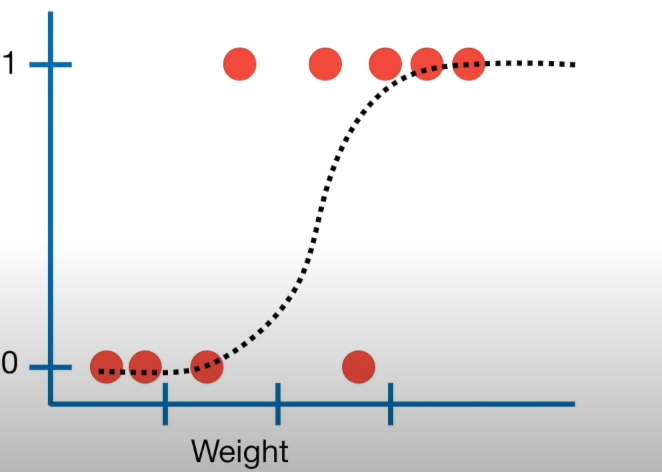


<br>

**Métricas para analizar performance Logistic Regression**

Para evaluar el desempeño de este algoritmo se utiliza técnas como accuracy y ROC (Receiver Operating Characteristic). Accuracy no es más que la division de los casos correctamente predecidos entre los casos totales. ROC es una manera gráfica de interpretar una matriz de confusión para diferenciar de manera gráfica cuantos faltos positivos y verdaderos positivos hay. Más adelante en esta tarea se muestra como realizarlo en python. 

<br>

**Estrategia para tarea 05**

Se cuenta con un set de datos de 4920 pacientes. Voy a dividir esos datos en 70% para training y 30% testing. Utilizaré la técnica de one hot encoding en donde a la columna de prognosis, que es la que contiene el nombre de la enfermedad dado los síntomas, se cambiará a 1 para todos aquellos pacientes que tengan diabetes y 0 al resto de las enfermedades. 

El objetivo es preddecir dados 133 síntomas posibles, predecir la presencia o no de diabetes. 




In [ ]:
! git clone https://github.com/JoeAM11/MachineLearning_EM23.git

Cloning into 'MachineLearning_EM23'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 69 (delta 30), reused 4 (delta 2), pack-reused 0
Unpacking objects: 100% (69/69), 930.07 KiB | 1.54 MiB/s, done.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [58]:
# Train = 3445 pacientes - 70%
# Test  = 1475 pacientes - 30%

df_test = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/Testing_Tarea06.csv') 
df_train = pd.read_csv('/content/MachineLearning_EM23/Tarea06_ML_Febrero_AprendizajeSupervisado/training_Tarea06.csv') 

In [59]:
# Liberías para ejecutar Linear regression para datos binarios

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [60]:
# Preparar data frame de training y testing 

# Sacar todas las X del dataframe de train; Quitar prognosis
x_train = df_train.drop('prognosis', axis=1)
# Sacar la variable de respuesta del data frame de train, en este caso prognosis
y_train = df_train.prognosis




# Preparar data frame de testing; mismo paso anterior pero con la matriz de test  
x_test = df_test.drop('prognosis', axis=1)
y_test = df_test.prognosis


In [61]:
# Fit del modelo con los datos de entrenamiento 
clf = LogisticRegression(random_state=0)
clf.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [62]:
# Accuracy is defined as the number of correct predictions divided by the total number of predictions made by the model. It is a measure of how well the model is able to classify the data correctly.
# Comparar la prediccion del modelo contra el resultado real  

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Se obtuvo un accuracy de 1.0, lo cual quiere decir que para todos las pacientes que tienne diabetes, según sus síntomas, fuimos capaces de predecir que tenía Diabetes. 
# Por el momento se me hace algo sospechoso que haya funcionado tan bien a la primera.
  # Sin embargo, cabe la posibilidad que Diabetes sea una enfermedad muy bien estudiada de tal manera que se conocen muy bien sus síntomas y es difícil confundirlo con otra enfermedad. 


Accuracy: 1.0


In [63]:
# Matiriz de confusión 

#                    Predicted positive    Predicted negative
# Actual positive    True positive (TP)    False negative (FN)
# Actual negative    False positive (FP)   True negative (TN)



from sklearn.metrics import confusion_matrix, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_matrix)


# Resultados 
  # 1436 True Positives - No se tiene la enfermedad y se predijo que se tenía.
  # 36 True negatives   - Se tiene la enferdad se predijo que se tenía. 
    # Me parece que el algoritmo está considerado el 0 como positive y el 1 como negative dado que yo sé que de la test data habían 36 casos de diabetes. 
      # Me los están marcando como TRUE NEGATIVE, cuando esperaba fuera TRUE POSITIVE
      # Pendiente de revisar dónde puedo cambiar la lógica de interpretación de 0s y 1s


Confusion matrix:
 [[1439    0]
 [   0   36]]


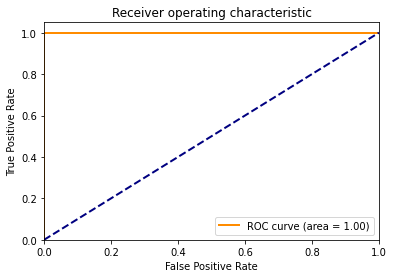

In [64]:
# ROC (Receiver Operating Characteristic) 
 # The ROC (Receiver Operating Characteristic) curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various classification thresholds.
  # In the context of a binary classification problem like predicting the presence or absence of an illness, the TPR is the proportion of actual positive cases that are correctly 
  # identified as positive by the model (i.e., the number of true positives divided by the sum of true positives and false negatives), and the FPR is the proportion of actual negative 
  # cases that are incorrectly identified as positive by the model (i.e., the number of false positives divided by the sum of false positives and true negatives).

y_score = clf.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Dudas 

* Duda como generar una tabla S de probabilidad de una linear logistic regression en python.
  * ¿Cómo sacar los probabilidades de predicción por individuo. Si logra hacer eso creo que puedo plotearlo. Trabajo a futuro. 

* En general me siento algo confundido con que mis datos sean binarios y mi variable de respuesta sea categorica. 
  * En la tarea pasada también me paso. Comentar con profesor que recomienda sea los algoritmos a utilizar para estos casos. 
  * Pareciera que estos algorittmos brillan cuando la variable de respuesta a numerica. 

* El escalamiento de los datos que el profesor está usando. Creo que en el trabajo tendría que hacer algo similar para comparar aceleraciónes, strain, desplazamiento, presion etc? 